<a href="https://colab.research.google.com/github/iskanor1/Characters-arabic/blob/main/Characters_Arabic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mloey1/ahcd1")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ahcd1


Found 12096 images belonging to 1 classes.
Found 1344 images belonging to 1 classes.
Found 3360 images belonging to 1 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 28)             │         7,196 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 624,412 (2.38 MB)

 Trainable params: 624,412 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - accuracy: 0.9703 - loss: 0.2431 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/20
189/189 ━━━━━━━━━━━━━━━━━━━

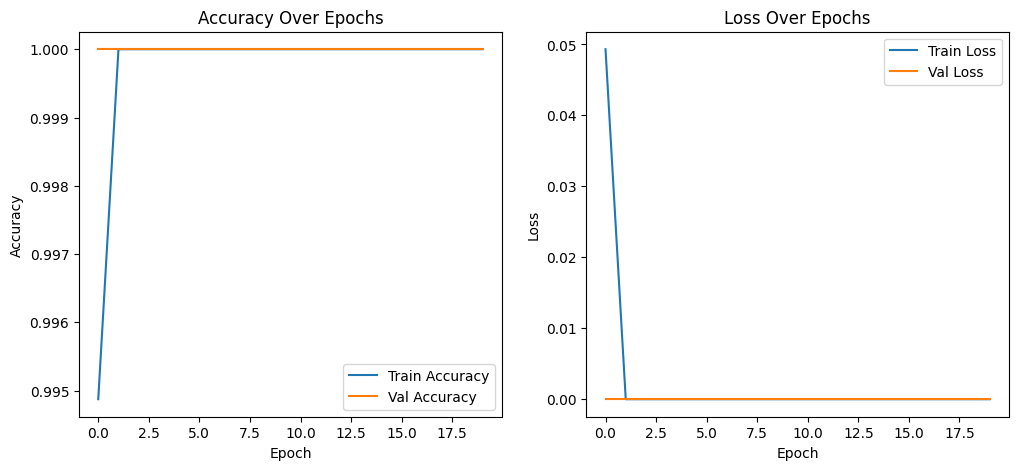

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Paths
train_dir = '/kaggle/input/ahcd1/Train Images 13440x32x32'
test_dir = '/kaggle/input/ahcd1/Test Images 3360x32x32'

# Step 2: Data Generators
batch_size = 64
img_height, img_width = 32, 32

# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    validation_split=0.1  # split training into train/val
)

# Testing data generator (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='sparse',  # important: sparse
    subset='training',
    shuffle=True,
    seed=42
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='sparse',  # important: sparse
    subset='validation',
    shuffle=True,
    seed=42
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='sparse',  # important: sparse
    shuffle=False
)

# Step 3: Build the CNN model
model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 1)),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(28, activation='softmax')  # 28 classes
])

# Step 4: Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()

# Step 5: Train the model
epochs = 20

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Step 6: Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Step 7: Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 1.0000 - loss: 0.0000e+00



Test Accuracy: 1.0000

Model saved (Keras format) to: /content/saved_models/arabic_handwriting_model.keras
Model saved (HDF5 format) to: /content/saved_models/arabic_handwriting_model.h5
Model weights saved to: /content/saved_models/arabic_handwriting.weights.h5


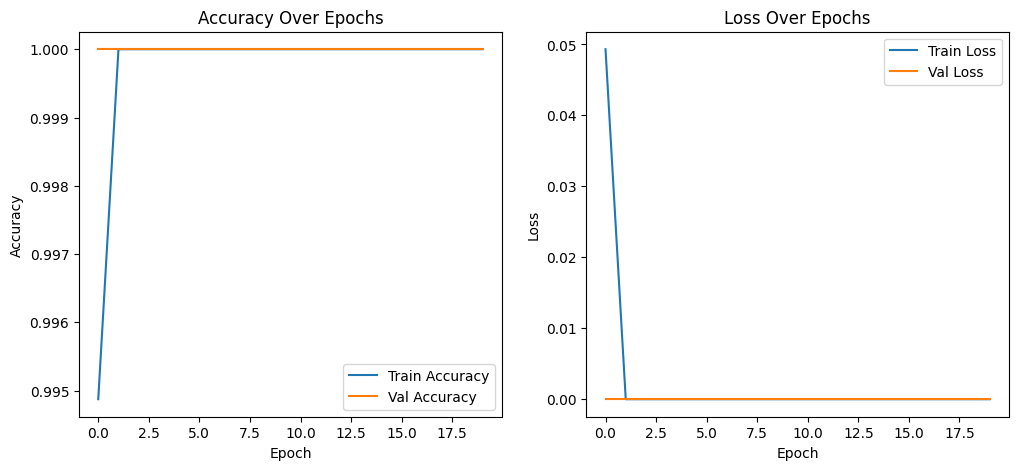

In [ ]:
# Step 6: Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Step 7: Save the trained model
save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)  # Create directory if it doesn't exist

# Option 1: Save the entire model in modern Keras format (recommended)
keras_model_path = os.path.join(save_dir, "arabic_handwriting_model.keras")
model.save(keras_model_path)
print(f"\nModel saved (Keras format) to: {os.path.abspath(keras_model_path)}")

# Option 2: Save in legacy HDF5 format (with warning)
h5_model_path = os.path.join(save_dir, "arabic_handwriting_model.h5")
model.save(h5_model_path)
print(f"Model saved (HDF5 format) to: {os.path.abspath(h5_model_path)}")

# Option 3: Save just the weights (with correct extension)
weights_path = os.path.join(save_dir, "arabic_handwriting.weights.h5")  # Note the required extension
model.save_weights(weights_path)
print(f"Model weights saved to: {os.path.abspath(weights_path)}")

# Step 8: Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [36]:
from IPython.display import display, HTML
import base64
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

# Load your trained model
model = load_model('/content/saved_models/arabic_handwriting_model.keras')
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Arabic character labels
arabic_chars = [
    'ا', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص',
    'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ي'
]

def preprocess_image(img):
    """Prepare image for model prediction"""
    img = cv2.resize(img, (32, 32))
    img = cv2.bitwise_not(img)  # Invert colors (like training data)
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=-1)  # Add channel dimension
    img = np.expand_dims(img, axis=0)   # Add batch dimension
    return img

def get_webcam_image():
    """Capture image from webcam using JavaScript"""
    js = """
    async function capture() {
        const div = document.createElement('div');
        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Wait for video to be ready
        await new Promise((resolve) => {
            video.onplaying = resolve;
        });

        const canvas = document.createElement('canvas');
        canvas.width = 640;
        canvas.height = 480;
        canvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', 0.8);
    }
    capture().then(url => {
        google.colab.kernel.invokeFunction('notebook.get_webcam_image', [url], {});
    });
    """

    display(HTML(f"""
    <button onclick="run()">Enable Camera</button>
    <script>
        {js}
        function run() {{
            capture();
        }}
    </script>
    """))

    from google.colab import output
    data = output.eval_js('capture()')
    binary = base64.b64decode(data.split(',')[1])
    return cv2.imdecode(np.frombuffer(binary, dtype=np.uint8), -1)

def process_frame(frame):
    """Process frame and make predictions"""
    # Convert to grayscale and threshold
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        if cv2.contourArea(contour) > 1000:  # Only consider larger contours
            x, y, w, h = cv2.boundingRect(contour)

            # Extract character
            char_img = thresh[y:y+h, x:x+w]

            # Preprocess and predict
            processed_img = preprocess_image(char_img)
            pred = model.predict(processed_img, verbose=0)
            pred_class = np.argmax(pred)
            confidence = np.max(pred)

            # Display results
            if confidence > 0.7:
                cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
                text = f"{arabic_chars[pred_class]} ({confidence:.2f})"
                cv2.putText(frame, text, (x, y-10),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    return frame

# Main execution
print("Click the button below to enable camera")
frame = get_webcam_image()

if frame is not None:
    processed_frame = process_frame(frame)
    cv2_imshow(processed_frame)
else:
    print("Could not access webcam. Please check permissions.")

Click the button below to enable camera


AttributeError: 'NoneType' object has no attribute 'split'